<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Social_Media_Users_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Social Media Users.csv')
df.head(11)

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13
3,Instagram,Meta,Photo and video sharing,Timor-Leste,295.43,Yes,2019-04-21
4,Threads,Meta,Text-based social networking,Bermuda,71.78,No,2015-07-14
5,X (formerly Twitter),X Corp.,Microblogging,Falkland Islands (Malvinas),92.82,No,2021-04-12
6,Instagram,Meta,Photo and video sharing,Mauritius,227.85,No,2016-06-25
7,TikTok,ByteDance,Short-form videos,Uganda,44.91,Yes,2023-04-26
8,Quora,Quora Inc.,Q&A knowledge sharing,Norway,140.46,Yes,2016-04-09
9,X (formerly Twitter),X Corp.,Microblogging,Anguilla,235.13,No,2019-05-17


In [4]:
df.tail(11)

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
9989,Instagram,Meta,Photo and video sharing,Dominica,47.46,No,2020-04-06
9990,WeChat,Tencent,Messaging and social media,Chile,90.45,Yes,2021-09-25
9991,Reddit,Reddit Inc.,Discussion forums and communities,Oman,65.41,Yes,2016-01-08
9992,Quora,Quora Inc.,Q&A knowledge sharing,Norway,121.13,No,2020-09-07
9993,WeChat,Tencent,Messaging and social media,Portugal,285.91,Yes,2017-02-22
9994,LinkedIn,Microsoft,Professional networking,Bermuda,104.86,No,2018-06-18
9995,Pinterest,Pinterest Inc.,Visual discovery and bookmarking,Morocco,249.12,No,2024-04-23
9996,Reddit,Reddit Inc.,Discussion forums and communities,Cape Verde,111.38,Yes,2017-03-06
9997,Quora,Quora Inc.,Q&A knowledge sharing,Poland,87.88,No,2018-05-17
9998,Quora,Quora Inc.,Q&A knowledge sharing,Lao People's Democratic Republic,205.69,Yes,2019-10-07


In [5]:
df.shape

(10000, 7)

In [6]:
df.columns

Index(['Platform', 'Owner', 'Primary Usage', 'Country',
       'Daily Time Spent (min)', 'Verified Account', 'Date Joined'],
      dtype='object')

In [7]:
df.dtypes

,0
Platform,object
Owner,object
Primary Usage,object
Country,object
Daily Time Spent (min),float64
Verified Account,object
Date Joined,object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Platform                10000 non-null  object 
 1   Owner                   10000 non-null  object 
 2   Primary Usage           10000 non-null  object 
 3   Country                 10000 non-null  object 
 4   Daily Time Spent (min)  10000 non-null  float64
 5   Verified Account        10000 non-null  object 
 6   Date Joined             10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [11]:
df.describe(include = 'all')

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
count,10000,10000,10000,10000,10000.000000,10000,10000
unique,14,11,13,243,NaN,2,3423
top,Reddit,Meta,Messaging,Congo,NaN,No,2015-07-17
freq,764,2857,1375,82,NaN,5006,10
mean,NaN,NaN,NaN,NaN,152.211145,NaN,NaN
std,NaN,NaN,NaN,NaN,85.142750,NaN,NaN
min,NaN,NaN,NaN,NaN,5.020000,NaN,NaN
25%,NaN,NaN,NaN,NaN,78.920000,NaN,NaN
50%,NaN,NaN,NaN,NaN,152.735000,NaN,NaN
75%,NaN,NaN,NaN,NaN,225.642500,NaN,NaN


In [12]:
df.isnull().sum()

,0
Platform,0
Owner,0
Primary Usage,0
Country,0
Daily Time Spent (min),0
Verified Account,0
Date Joined,0


In [13]:
df.duplicated().sum()

np.int64(0)

# Handling Outliers

In [23]:
# Assuming 'Platform' should be an integer:
df['Platform'] = pd.to_numeric(df['Platform'], errors='coerce')
# Assuming 'Owner' should be an integer:
df['Owner'] = pd.to_numeric(df['Owner'], errors='coerce')
#Recalculate quantiles and IQR
Q1 = df['Platform'].quantile(0.25)
Q3 = df['Platform'].quantile(0.75)  # Correct Q3 Calculation
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Platform'] < lower_bound) | (df['Platform'] > upper_bound)] # remove outlier logic for 'Owner' as quantile calculation logic is not valid for this type of data

In [25]:
# Removing Outliers

df_no_outliers = df[(df['Platform'] >= lower_bound) & (df['Owner'] <= upper_bound)]

# Univariate analysis:

# Numerical Variable:

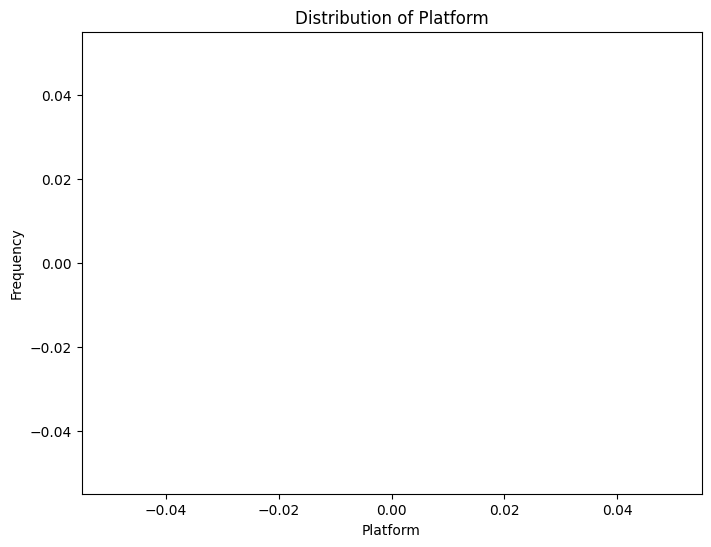

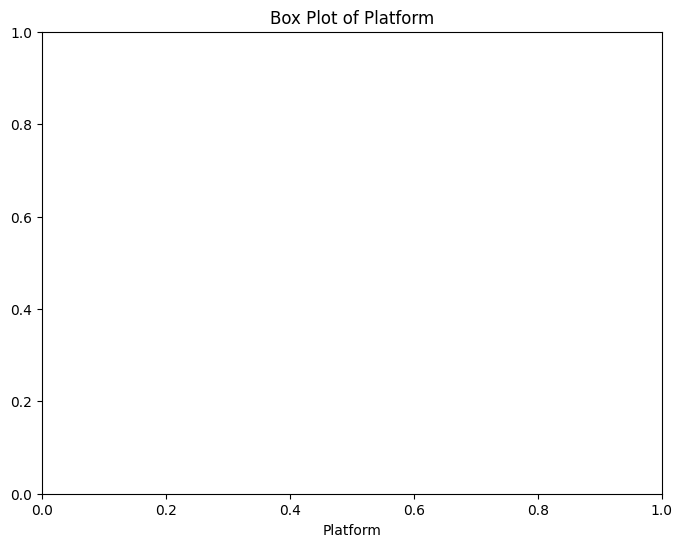

Descriptive Statistics for Platform:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Platform, dtype: float64



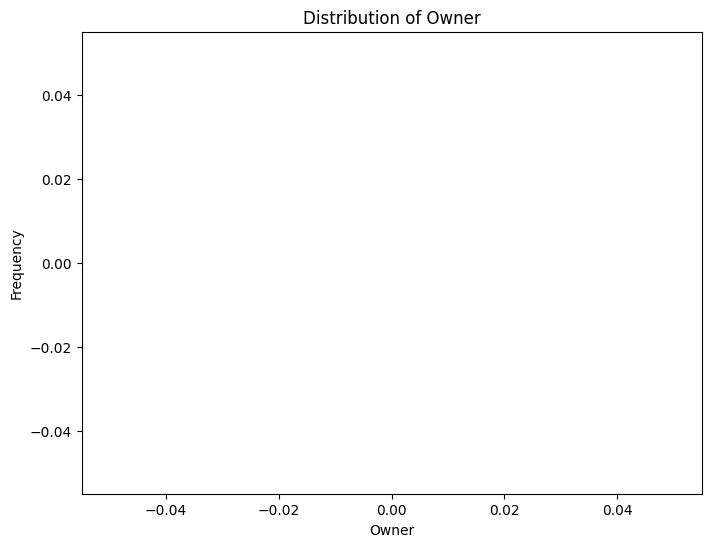

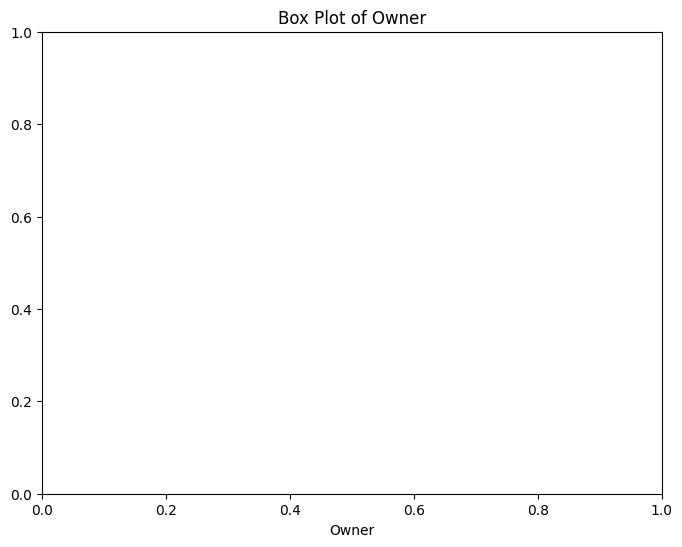

Descriptive Statistics for Owner:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Owner, dtype: float64



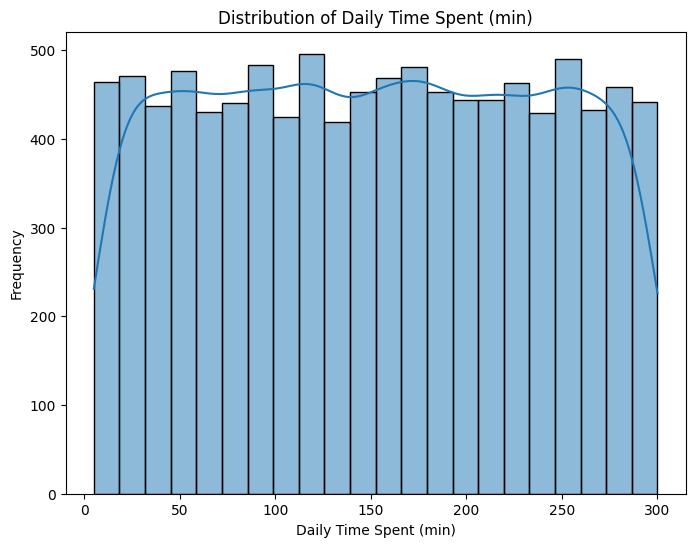

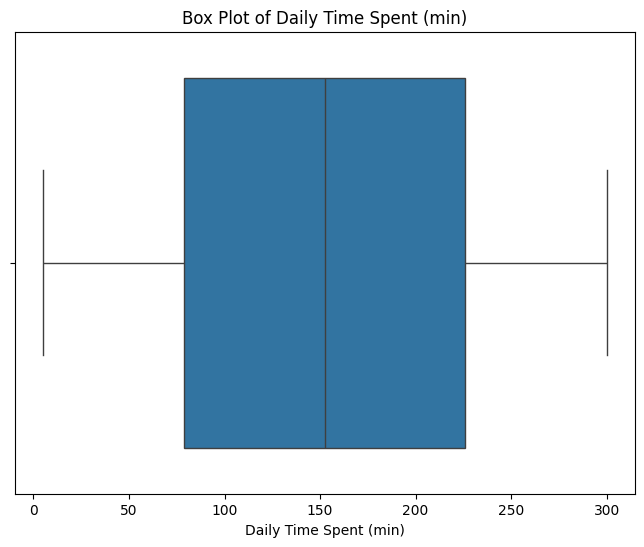

Descriptive Statistics for Daily Time Spent (min):
count    10000.000000
mean       152.211145
std         85.142750
min          5.020000
25%         78.920000
50%        152.735000
75%        225.642500
max        300.000000
Name: Daily Time Spent (min), dtype: float64



In [27]:
# Numerical Variables:
numerical_vars = df.select_dtypes(include=['number']).columns

for var in numerical_vars:
    # Remove missing values for the current variable
    data_to_plot = df[var].dropna()

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data_to_plot, kde=True)  # kde adds a kernel density estimate curve
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_to_plot)  # Use data_to_plot here
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

    # Descriptive Statistics
    print(f"Descriptive Statistics for {var}:\n{df[var].describe()}\n")

# Categorical Variable:

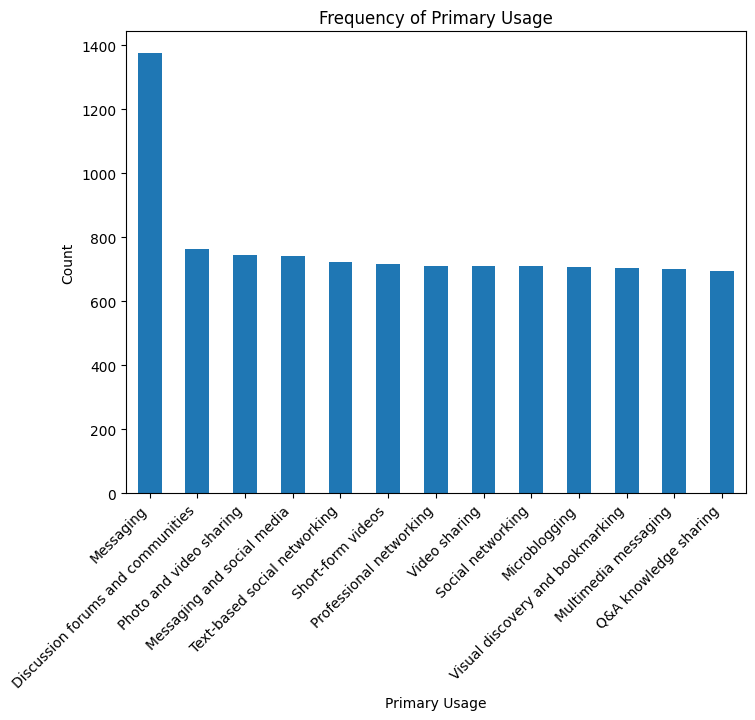

Frequency Table for Primary Usage:
Primary Usage
Messaging                            1375
Discussion forums and communities     764
Photo and video sharing               745
Messaging and social media            742
Text-based social networking          724
Short-form videos                     716
Professional networking               710
Video sharing                         709
Social networking                     709
Microblogging                         706
Visual discovery and bookmarking      704
Multimedia messaging                  701
Q&A knowledge sharing                 695
Name: count, dtype: int64



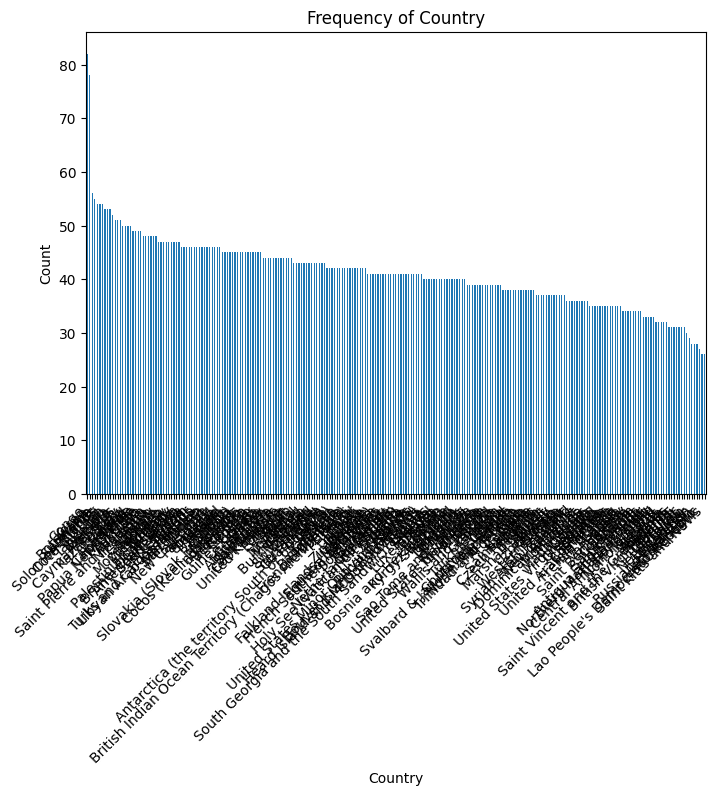

Frequency Table for Country:
Country
Congo                               82
Korea                               78
Botswana                            56
Suriname                            55
Armenia                             54
                                    ..
Russian Federation                  28
Liechtenstein                       28
Montenegro                          27
Lao People's Democratic Republic    26
Saint Kitts and Nevis               26
Name: count, Length: 243, dtype: int64



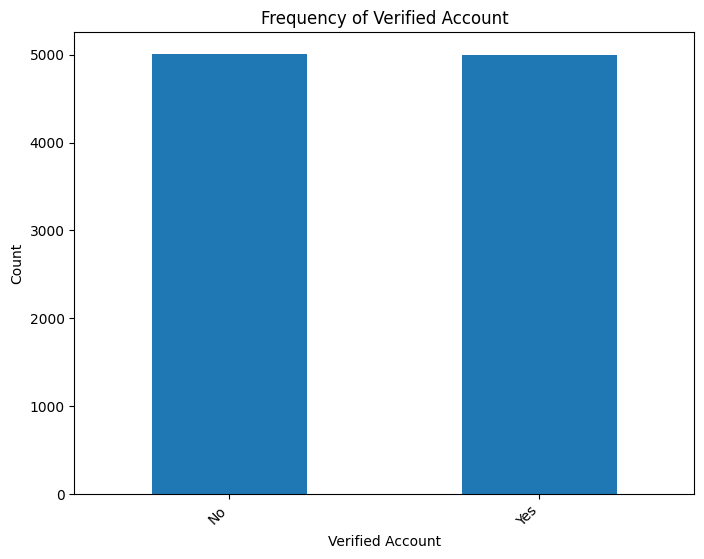

Frequency Table for Verified Account:
Verified Account
No     5006
Yes    4994
Name: count, dtype: int64



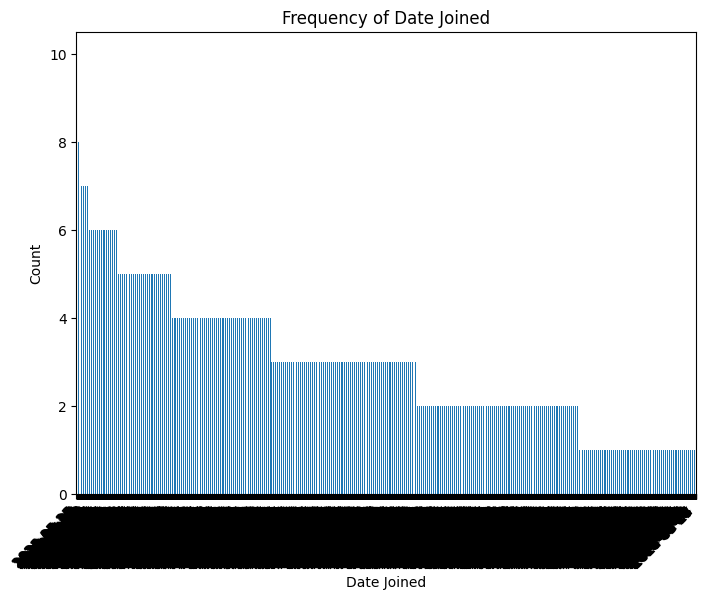

Frequency Table for Date Joined:
Date Joined
2015-07-17    10
2018-05-29    10
2022-12-22    10
2024-10-16     9
2020-02-20     9
              ..
2025-01-18     1
2016-09-29     1
2022-11-05     1
2016-01-04     1
2024-05-17     1
Name: count, Length: 3423, dtype: int64



In [28]:
# Categorical Variables:
categorical_vars = df.select_dtypes(include=['object']).columns

for var in categorical_vars:
    # Bar Chart
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Frequency Table
    print(f"Frequency Table for {var}:\n{df[var].value_counts()}\n")

# Bivariate analysis:

In [31]:
# Select numerical variables (excluding those with all missing values)
numerical_vars = df.select_dtypes(include=['number']).columns
numerical_vars = [var for var in numerical_vars if df[var].notna().any()]

# Create scatter plots and calculate correlations
for i in range(len(numerical_vars)):
    for j in range(i + 1, len(numerical_vars)):
        var1 = numerical_vars[i]
        var2 = numerical_vars[j]

        # Scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[var1], y=df[var2])
        plt.title(f'Scatter Plot of {var1} vs. {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()

        # Correlation
        correlation = df[var1].corr(df[var2])
        print(f"Correlation between {var1} and {var2}: {correlation:.2f}")

# Visualization

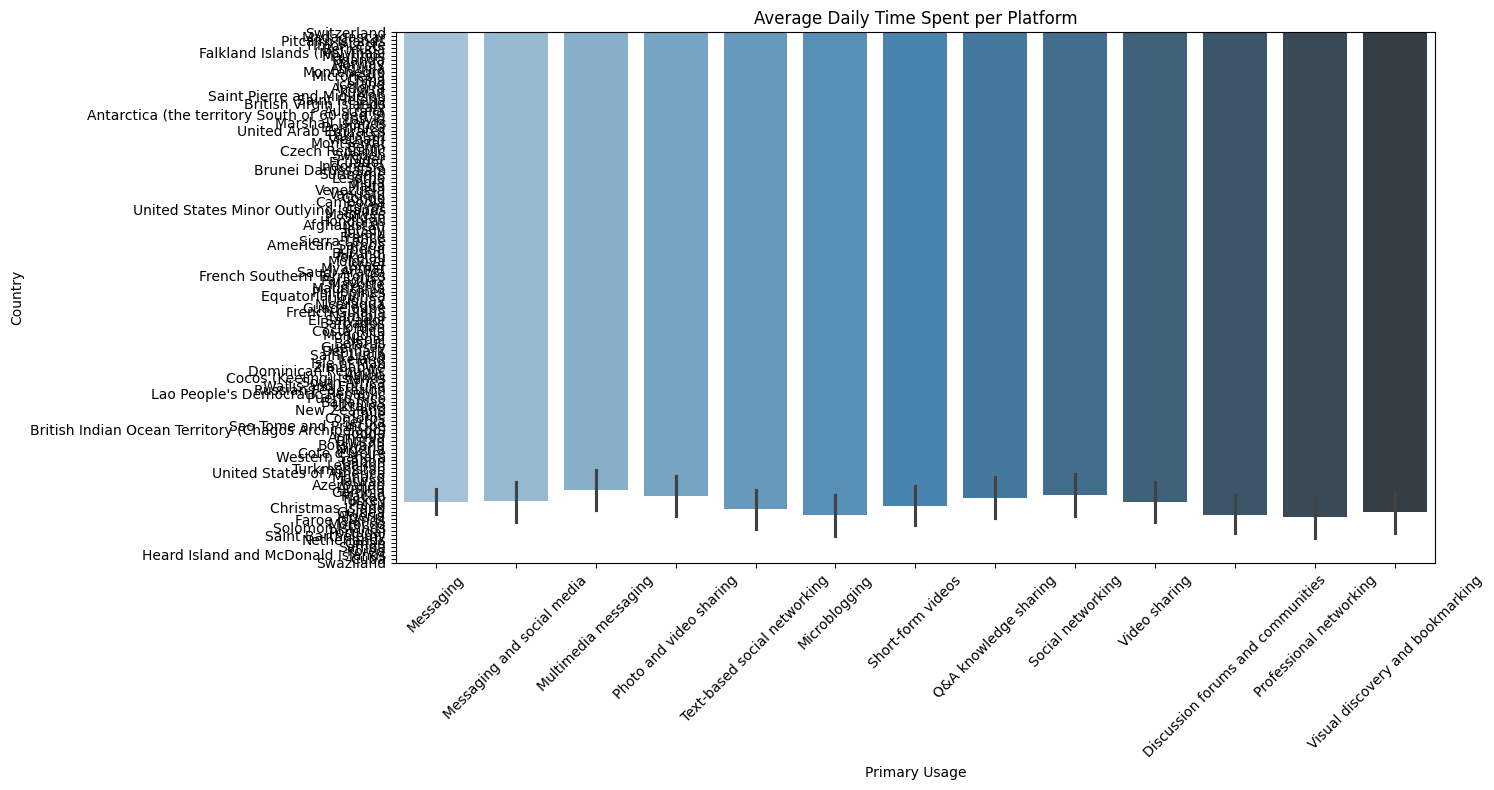

In [42]:
# 1. Bar Chart: Average Daily Time per Platform
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Primary Usage', y='Country', estimator='mean', palette='Blues_d')
plt.title('Average Daily Time Spent per Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

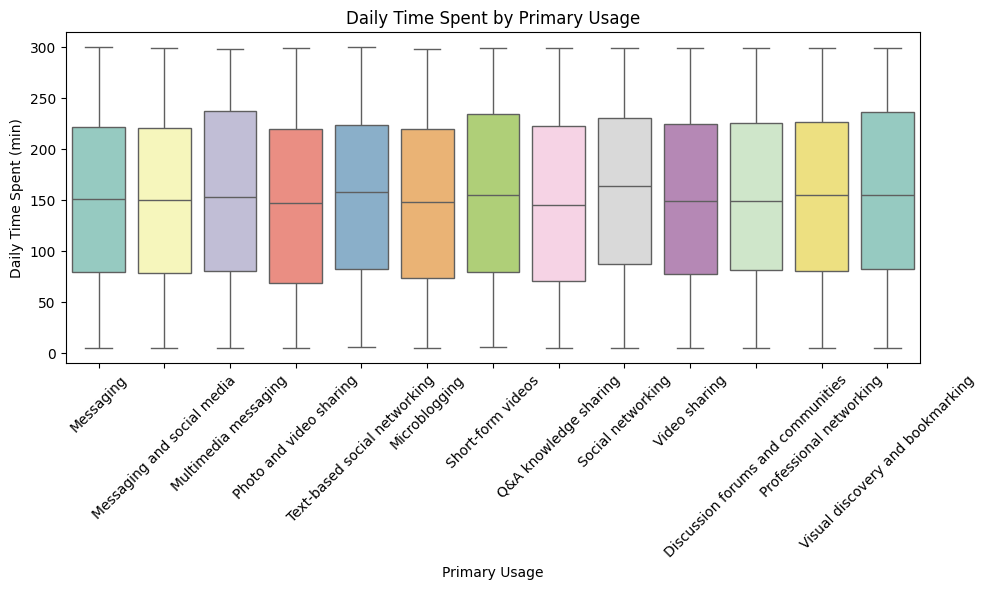

In [34]:
# 2. Box Plot: Daily Time by Primary Usage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Primary Usage', y='Daily Time Spent (min)', palette='Set3')
plt.title('Daily Time Spent by Primary Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

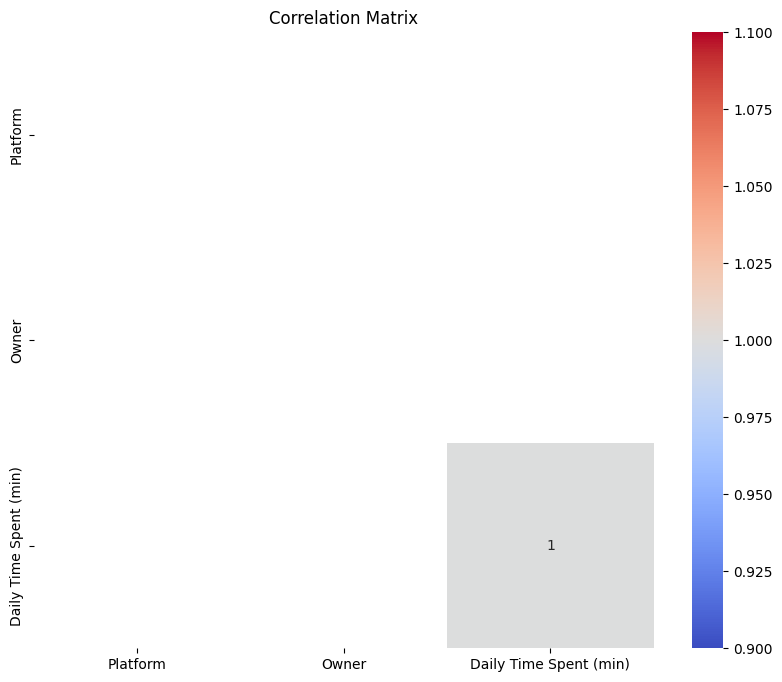

In [44]:
plt.figure(figsize=(10, 8))
# Only include numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Thank you